In [ ]:
'''
Bonus project stuff by Andrew Kim 

For this part, I will analyze the NBA and why the points scored per year for each of the basketball positions was 
trending slowly upwards or was fluctuating up and down. 
'''

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [27]:
stats1 = pd.read_csv("1950-2017/Seasons_Stats.csv", index_col=0)

In [28]:
stats1 = stats1[stats1["Year"] >= 2000.0]
stats1.head(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
14470,2000.0,Tariq Abdul-Wahad,SG,25.0,TOT,61.0,56.0,1578.0,13.6,0.477,...,0.756,101.0,190.0,291.0,98.0,59.0,28.0,106.0,147.0,697.0
14471,2000.0,Tariq Abdul-Wahad,SG,25.0,ORL,46.0,46.0,1205.0,14.4,0.484,...,0.762,77.0,162.0,239.0,72.0,53.0,16.0,87.0,116.0,563.0
14472,2000.0,Tariq Abdul-Wahad,SG,25.0,DEN,15.0,10.0,373.0,10.8,0.448,...,0.738,24.0,28.0,52.0,26.0,6.0,12.0,19.0,31.0,134.0
14473,2000.0,Shareef Abdur-Rahim,SF,23.0,VAN,82.0,82.0,3223.0,20.2,0.547,...,0.809,218.0,607.0,825.0,271.0,89.0,87.0,249.0,244.0,1663.0
14474,2000.0,Cory Alexander,PG,26.0,DEN,29.0,2.0,329.0,8.8,0.381,...,0.773,8.0,34.0,42.0,58.0,24.0,2.0,28.0,39.0,82.0
14475,2000.0,Ray Allen,SG,24.0,MIL,82.0,82.0,3070.0,20.6,0.570,...,0.887,83.0,276.0,359.0,308.0,110.0,19.0,183.0,187.0,1809.0
14476,2000.0,Rafer Alston,PG,23.0,MIL,27.0,0.0,361.0,4.3,0.310,...,0.750,5.0,18.0,23.0,70.0,12.0,0.0,29.0,29.0,60.0
14477,2000.0,John Amaechi,C,29.0,ORL,80.0,53.0,1684.0,13.2,0.505,...,0.766,62.0,204.0,266.0,95.0,35.0,37.0,139.0,161.0,836.0
14478,2000.0,Derek Anderson,SG,25.0,LAC,64.0,58.0,2201.0,16.9,0.542,...,0.877,80.0,178.0,258.0,220.0,90.0,11.0,167.0,149.0,1080.0
14479,2000.0,Kenny Anderson,PG,29.0,BOS,82.0,82.0,2593.0,17.4,0.524,...,0.775,55.0,170.0,225.0,420.0,139.0,8.0,130.0,230.0,1149.0


In [31]:
def totalOnly(df):
    for index, row in df.iterrows():
        if (row["Tm"] == "TOT"):
            #print (index)
            df.drop([index + 1, index + 2], inplace = True)
totalOnly(stats1)

In [32]:
stats1 = stats1.filter(["Year", "Player", "Pos", "Tm", "FG", "FGA", "3P", "3PA", "2P", "2PA"])
stats1.head(10)

,Year,Player,Pos,Tm,FG,FGA,3P,3PA,2P,2PA
14470,2000.0,Tariq Abdul-Wahad,SG,TOT,274.0,646.0,3.0,23.0,271.0,623.0
14473,2000.0,Shareef Abdur-Rahim,SF,VAN,594.0,1277.0,29.0,96.0,565.0,1181.0
14474,2000.0,Cory Alexander,PG,DEN,28.0,98.0,9.0,35.0,19.0,63.0
14475,2000.0,Ray Allen,SG,MIL,642.0,1411.0,172.0,407.0,470.0,1004.0
14476,2000.0,Rafer Alston,PG,MIL,27.0,95.0,3.0,14.0,24.0,81.0
14477,2000.0,John Amaechi,C,ORL,306.0,700.0,1.0,6.0,305.0,694.0
14478,2000.0,Derek Anderson,SG,LAC,377.0,860.0,55.0,178.0,322.0,682.0
14479,2000.0,Kenny Anderson,PG,BOS,434.0,986.0,85.0,220.0,349.0,766.0
14480,2000.0,Nick Anderson,SG,SAC,306.0,782.0,132.0,397.0,174.0,385.0
14481,2000.0,Shandon Anderson,SF,HOU,368.0,778.0,79.0,225.0,289.0,553.0


In [33]:
stats2 = pd.read_csv("2018-2021/NBA_stats.csv")

In [34]:
stats2.rename(columns = {"Team": "Tm", "Fields Goal": "FG", "Fields Goal Attempted": "FGA", "3-points Field Goal": "3P", 
              "3-points Field Goal Attempted": "3PA", "2-points Field Goal": "2P", "2-points Field Goal Attempted": "2PA"}, 
              inplace=True)
stats2.head(10)

,Player,Pos,Age,Tm,Games,Minutes Played,FG,FGA,3P,3PA,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Rank,Year
0,Álex Abrines,SG,24,OKC,75,15.1,1.5,3.9,1.1,2.9,...,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,1,2018
1,Quincy Acy,PF,27,BRK,70,19.4,1.9,5.2,1.5,4.2,...,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,2,2018
2,Steven Adams,C,24,OKC,76,32.7,5.9,9.4,0.0,0.0,...,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,3,2018
3,Bam Adebayo,C,20,MIA,69,19.8,2.5,4.9,0.0,0.1,...,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,4,2018
4,Arron Afflalo,SG,32,ORL,53,12.9,1.2,3.1,0.5,1.3,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,5,2018
5,Cole Aldrich,C,29,MIN,21,2.3,0.2,0.7,0.0,0.0,...,0.6,0.7,0.1,0.1,0.0,0.0,0.5,0.6,6,2018
6,LaMarcus Aldridge,C,32,SAS,75,33.5,9.2,18.0,0.4,1.2,...,5.2,8.5,2.0,0.6,1.2,1.5,2.1,23.1,7,2018
7,Jarrett Allen,C,19,BRK,72,20.0,3.3,5.5,0.1,0.2,...,3.4,5.4,0.7,0.4,1.2,1.1,2.0,8.2,8,2018
8,Kadeem Allen,PG,25,BOS,18,5.9,0.3,1.2,0.0,0.6,...,0.4,0.6,0.7,0.2,0.1,0.5,0.8,1.1,9,2018
9,Tony Allen,SF,36,NOP,22,12.4,2.0,4.1,0.2,0.5,...,1.2,2.1,0.4,0.5,0.1,0.9,2.2,4.7,10,2018


In [35]:
# Converting FG average to total FGs made per year. Ditto for FGA, 3P, 3PA, 2P, and 2PA (Run these lines of code only once)

stats2["FG"] = round((stats2["FG"] * stats2["Games"]), 1)
stats2["FGA"] = round((stats2["FGA"] * stats2["Games"]), 1)
stats2["3P"] = round((stats2["3P"] * stats2["Games"]), 1)
stats2["3PA"] = round((stats2["3PA"] * stats2["Games"]), 1)
stats2["2P"] = round((stats2["2P"] * stats2["Games"]), 1)
stats2["2PA"] = round((stats2["2PA"] * stats2["Games"]), 1)
stats2.head(10)

,Player,Pos,Age,Tm,Games,Minutes Played,FG,FGA,3P,3PA,...,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,Rank,Year
0,Álex Abrines,SG,24,OKC,75,15.1,112.5,292.5,82.5,217.5,...,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7,1,2018
1,Quincy Acy,PF,27,BRK,70,19.4,133.0,364.0,105.0,294.0,...,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9,2,2018
2,Steven Adams,C,24,OKC,76,32.7,448.4,714.4,0.0,0.0,...,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9,3,2018
3,Bam Adebayo,C,20,MIA,69,19.8,172.5,338.1,0.0,6.9,...,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9,4,2018
4,Arron Afflalo,SG,32,ORL,53,12.9,63.6,164.3,26.5,68.9,...,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4,5,2018
5,Cole Aldrich,C,29,MIN,21,2.3,4.2,14.7,0.0,0.0,...,0.6,0.7,0.1,0.1,0.0,0.0,0.5,0.6,6,2018
6,LaMarcus Aldridge,C,32,SAS,75,33.5,690.0,1350.0,30.0,90.0,...,5.2,8.5,2.0,0.6,1.2,1.5,2.1,23.1,7,2018
7,Jarrett Allen,C,19,BRK,72,20.0,237.6,396.0,7.2,14.4,...,3.4,5.4,0.7,0.4,1.2,1.1,2.0,8.2,8,2018
8,Kadeem Allen,PG,25,BOS,18,5.9,5.4,21.6,0.0,10.8,...,0.4,0.6,0.7,0.2,0.1,0.5,0.8,1.1,9,2018
9,Tony Allen,SF,36,NOP,22,12.4,44.0,90.2,4.4,11.0,...,1.2,2.1,0.4,0.5,0.1,0.9,2.2,4.7,10,2018


In [36]:
totalOnly(stats2)

In [37]:
stats2 = stats2.filter(["Year", "Player", "Pos", "Tm", "FG", "FGA", "2P", "2PA", "3P", "3PA"])
stats2.tail(30)

,Year,Player,Pos,Tm,FG,FGA,2P,2PA,3P,3PA
2692,2021,T.J. Warren,SF,IND,27.2,51.2,27.2,44.0,0.0,7.2
2693,2021,P.J. Washington,PF,CHO,300.8,684.8,192.0,396.8,115.2,288.0
2694,2021,Yuta Watanabe,SF,TOR,80.0,180.0,45.0,90.0,35.0,90.0
2695,2021,Tremont Waters,PG,BOS,33.8,83.2,18.2,46.8,15.6,39.0
2696,2021,Paul Watson,SF,TOR,37.8,81.0,8.1,18.9,29.7,64.8
2697,2021,Quinndary Weatherspoon,SG,SAS,16.0,36.0,16.0,30.0,2.0,6.0
2698,2021,Russell Westbrook,PG,WAS,546.0,1235.0,455.0,962.0,84.5,273.0
2699,2021,Coby White,PG,CHI,372.6,903.9,213.9,448.5,165.6,455.4
2700,2021,Derrick White,SG,SAS,187.2,453.6,100.8,208.8,82.8,244.8
2701,2021,Hassan Whiteside,C,SAC,126.0,223.2,126.0,223.2,0.0,0.0


In [38]:
all_stats = pd.merge(stats1, stats2, how = "outer")
all_stats

,Year,Player,Pos,Tm,FG,FGA,3P,3PA,2P,2PA
0,2000.0,Tariq Abdul-Wahad,SG,TOT,274.0,646.0,3.0,23.0,271.0,623.0
1,2000.0,Shareef Abdur-Rahim,SF,VAN,594.0,1277.0,29.0,96.0,565.0,1181.0
2,2000.0,Cory Alexander,PG,DEN,28.0,98.0,9.0,35.0,19.0,63.0
3,2000.0,Ray Allen,SG,MIL,642.0,1411.0,172.0,407.0,470.0,1004.0
4,2000.0,Rafer Alston,PG,MIL,27.0,95.0,3.0,14.0,24.0,81.0
...,...,...,...,...,...,...,...,...,...,...
10457,2021.0,Delon Wright,SG-PG,TOT,239.4,516.6,63.0,170.1,176.4,346.5
10458,2021.0,Thaddeus Young,PF,CHI,367.2,659.6,13.6,47.6,360.4,618.8
10459,2021.0,Trae Young,PG,ATL,485.1,1115.1,138.6,396.9,352.8,711.9
10460,2021.0,Cody Zeller,C,CHO,182.4,326.4,4.8,28.8,177.6,297.6


In [39]:
all_stats["FG%"] = round((all_stats["FG"]/all_stats["FGA"]) * 100, 1)
all_stats["Two-point FG%"] = round((all_stats["2P"]/all_stats["2PA"]) * 100, 1)
all_stats["Three-point FG%"] = round((all_stats["3P"]/all_stats["3PA"]) * 100, 1)
all_stats

,Year,Player,Pos,Tm,FG,FGA,3P,3PA,2P,2PA,FG%,Two-point FG%,Three-point FG%
0,2000.0,Tariq Abdul-Wahad,SG,TOT,274.0,646.0,3.0,23.0,271.0,623.0,42.4,43.5,13.0
1,2000.0,Shareef Abdur-Rahim,SF,VAN,594.0,1277.0,29.0,96.0,565.0,1181.0,46.5,47.8,30.2
2,2000.0,Cory Alexander,PG,DEN,28.0,98.0,9.0,35.0,19.0,63.0,28.6,30.2,25.7
3,2000.0,Ray Allen,SG,MIL,642.0,1411.0,172.0,407.0,470.0,1004.0,45.5,46.8,42.3
4,2000.0,Rafer Alston,PG,MIL,27.0,95.0,3.0,14.0,24.0,81.0,28.4,29.6,21.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10457,2021.0,Delon Wright,SG-PG,TOT,239.4,516.6,63.0,170.1,176.4,346.5,46.3,50.9,37.0
10458,2021.0,Thaddeus Young,PF,CHI,367.2,659.6,13.6,47.6,360.4,618.8,55.7,58.2,28.6
10459,2021.0,Trae Young,PG,ATL,485.1,1115.1,138.6,396.9,352.8,711.9,43.5,49.6,34.9
10460,2021.0,Cody Zeller,C,CHO,182.4,326.4,4.8,28.8,177.6,297.6,55.9,59.7,16.7


In [22]:
# FGs made 

FG_made = all_stats.filter(["Year", "FG"])
FG_made.tail(15)

,Year,FG
10447,2021.0,255.6
10448,2021.0,187.2
10449,2021.0,634.4
10450,2021.0,66.5
10451,2021.0,55.8
10452,2021.0,72.8
10453,2021.0,13.2
10454,2021.0,191.1
10455,2021.0,328.0
10456,2021.0,7.8


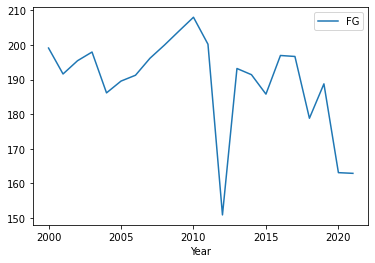

In [21]:
# Plot the FGs made data

average_FG = FG_made.groupby("Year").mean()
fg = average_FG.plot()

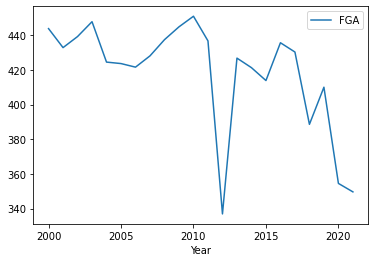

In [23]:
# Plot the FGAs made data

FGA_made = all_stats.filter(["Year", "FGA"])
average_FGA = FGA_made.groupby("Year").mean()
fga = average_FGA.plot()

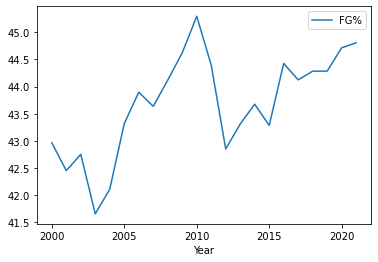

In [40]:
# Plot the FGAs made data

FG_percent_made = all_stats.filter(["Year", "FG%"])
average_FG_percent = FG_percent_made.groupby("Year").mean()
fgp = average_FG_percent.plot()

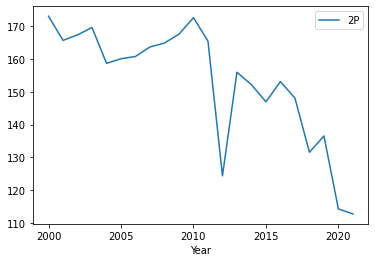

In [41]:
two_made = all_stats.filter(["Year", "2P"])
average_two = two_made.groupby("Year").mean()
two = average_two.plot()

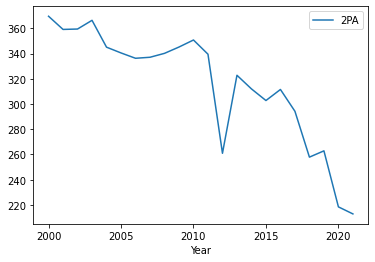

In [42]:
two_attempted = all_stats.filter(["Year", "2PA"])
average_two_attempted = two_attempted.groupby("Year").mean()
twoa = average_two_attempted.plot()

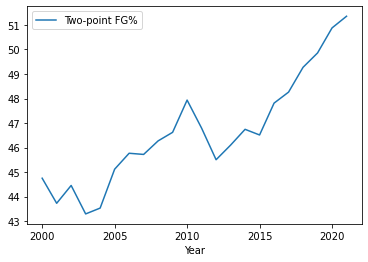

In [43]:
two_percent = all_stats.filter(["Year", "Two-point FG%"])
average_two_percent = two_percent.groupby("Year").mean()
twop = average_two_percent.plot()

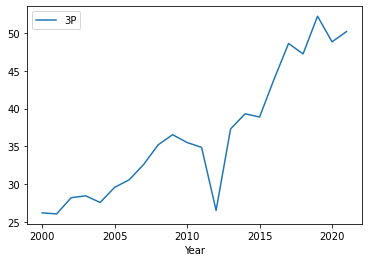

In [44]:
three_made = all_stats.filter(["Year", "3P"])
average_three = three_made.groupby("Year").mean()
three = average_three.plot()

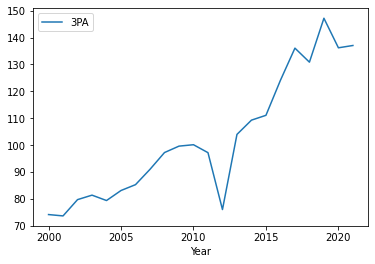

In [45]:
three_attempted = all_stats.filter(["Year", "3PA"])
average_three_attempted = three_attempted.groupby("Year").mean()
threea = average_three_attempted.plot()

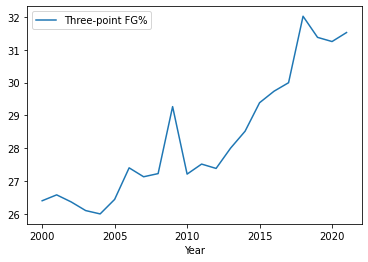

In [46]:
three_percent = all_stats.filter(["Year", "Three-point FG%"])
average_three_percent = three_percent.groupby("Year").mean()
threep = average_three_percent.plot()

In [47]:
# Three pointers made + positions 

all_three = all_stats.filter(["Year", "Pos", "3P"])
all_three

,Year,Pos,3P
0,2000.0,SG,3.0
1,2000.0,SF,29.0
2,2000.0,PG,9.0
3,2000.0,SG,172.0
4,2000.0,PG,3.0
...,...,...,...
10457,2021.0,SG-PG,63.0
10458,2021.0,PF,13.6
10459,2021.0,PG,138.6
10460,2021.0,C,4.8


In [52]:
# Point guards 

PG_three = all_three[all_three["Pos"] == "PG"]
PG_three = PG_three.filter(["Year", "3P"])
PG_three

,Year,3P
2,2000.0,9.0
4,2000.0,3.0
7,2000.0,85.0
11,2000.0,88.0
12,2000.0,13.0
...,...,...
10438,2021.0,84.5
10439,2021.0,165.6
10446,2021.0,66.0
10453,2021.0,8.8


Slope: 1.0595750385798746; intercept: -2081.428407379357


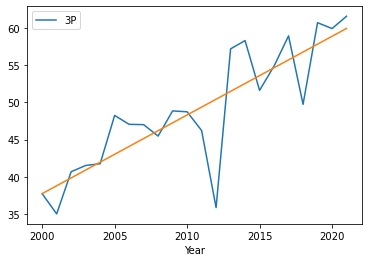

In [61]:
average_PG = PG_three.groupby("Year").mean()
x = np.array(PG_three["Year"])
y = np.array(PG_three["3P"])
m, b = np.polyfit(x, y, 1)
print("Slope: " + str(m) + "; intercept: " + str(b))
average_PG.plot()
plt.plot(x, m * x + b)

In [54]:
# Shooting guards 

SG_three = all_three[all_three["Pos"] == "SG"]
SG_three = SG_three.filter(["Year", "3P"])
SG_three

,Year,3P
0,2000.0,3.0
3,2000.0,172.0
6,2000.0,55.0
8,2000.0,132.0
15,2000.0,0.0
...,...,...
10417,2021.0,80.6
10419,2021.0,171.6
10429,2021.0,102.0
10437,2021.0,2.0


Slope: 1.031541391233979; intercept: -2016.0852245431938


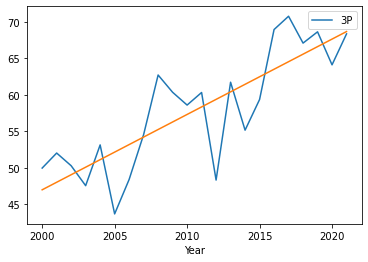

In [62]:
average_SG = SG_three.groupby("Year").mean()
x = np.array(SG_three["Year"])
y = np.array(SG_three["3P"])
m, b = np.polyfit(x, y, 1)
print("Slope: " + str(m) + "; intercept: " + str(b))
average_SG.plot()
plt.plot(x, m * x + b)

In [59]:
# Small forwards

SF_three = all_three[all_three["Pos"] == "SF"]
SF_three = SF_three.filter(["Year", "3P"])
SF_three

,Year,3P
1,2000.0,29.0
9,2000.0,79.0
27,2000.0,2.0
39,2000.0,0.0
40,2000.0,0.0
...,...,...
10434,2021.0,35.0
10436,2021.0,29.7
10451,2021.0,24.8
10452,2021.0,10.4


Slope: 1.0952578254378822; intercept: -2154.818242841693


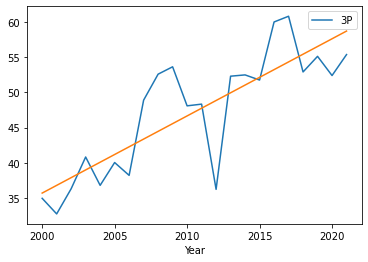

In [63]:
average_SF = SF_three.groupby("Year").mean()
x = np.array(SF_three["Year"])
y = np.array(SF_three["3P"])
m, b = np.polyfit(x, y, 1)
print("Slope: " + str(m) + "; intercept: " + str(b))
average_SF.plot()
plt.plot(x, m * x + b)

In [64]:
# Power forwards

PF_three = all_three[all_three["Pos"] == "PF"]
PF_three = PF_three.filter(["Year", "3P"])
PF_three

,Year,3P
17,2000.0,0.0
21,2000.0,6.0
30,2000.0,0.0
35,2000.0,0.0
37,2000.0,0.0
...,...,...
10445,2021.0,52.8
10447,2021.0,56.8
10449,2021.0,12.2
10450,2021.0,31.5


Slope: 1.601537613454742; intercept: -3195.188882018668


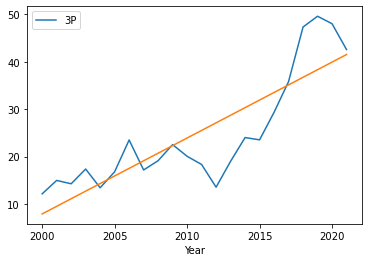

In [65]:
average_PF = PF_three.groupby("Year").mean()
x = np.array(PF_three["Year"])
y = np.array(PF_three["3P"])
m, b = np.polyfit(x, y, 1)
print("Slope: " + str(m) + "; intercept: " + str(b))
average_PF.plot()
plt.plot(x, m * x + b)

In [66]:
# Centers

C_three = all_three[all_three["Pos"] == "C"]
C_three = C_three.filter(["Year", "3P"])
C_three

,Year,3P
5,2000.0,1.0
10,2000.0,1.0
16,2000.0,1.0
20,2000.0,2.0
26,2000.0,1.0
...,...,...
10448,2021.0,0.0
10454,2021.0,11.7
10455,2021.0,77.9
10460,2021.0,4.8


Slope: 0.8286204614976639; intercept: -1659.7581077598543


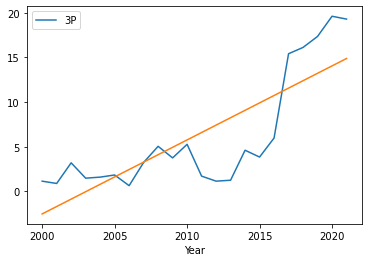

In [67]:
average_C = C_three.groupby("Year").mean()
x = np.array(C_three["Year"])
y = np.array(C_three["3P"])
m, b = np.polyfit(x, y, 1)
print("Slope: " + str(m) + "; intercept: " + str(b))
average_C.plot()
plt.plot(x, m * x + b)

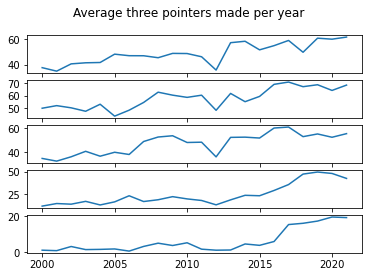

In [68]:
fig, axs = plt.subplots(5)
fig.suptitle("Average three pointers made per year")
axs[0].plot(average_PG)
axs[1].plot(average_SG)
axs[2].plot(average_SF)
axs[3].plot(average_PF)
axs[4].plot(average_C)